In [258]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pyterrier as pt
if not pt.started():
  pt.init()


In [263]:
query_result = pd.read_csv("./results/BM25_baseline.csv", index_col=0).sort_values(by="value", ascending=False)
res = pt.io.read_results("./results/BM25 Baseline.res.gz")

In [260]:
query_result[query_result["measure"]=="recip_rank"]["value"]

43     1.0
31     1.0
34     1.0
37     1.0
139    1.0
      ... 
582    NaN
585    NaN
588    NaN
591    NaN
594    NaN
Name: value, Length: 200, dtype: float64

In [262]:
dataset = pt.get_dataset("msmarco_passage")
indexrefe = dataset.get_index("terrier_stemmed")
index = pt.IndexFactory.of(indexrefe)
queries =dataset.get_topics("train")

print(index.getCollectionStatistics().toString())

17:11:05.328 [main] WARN org.terrier.applications.batchquerying.TRECQuery - trec.encoding is not set; resorting to platform default (windows-1252). Retrieval may be platform dependent. Recommend trec.encoding=UTF-8
Number of documents: 8841823
Number of terms: 1170682
Number of postings: 215238456
Number of fields: 1
Number of tokens: 288759529
Field names: [text]
Positions:   false



In [195]:
worst_query = []
best_query = []
for x in range(0,10):
    best_query_id = query_result.dropna()[query_result.dropna()["measure"]=="map"].iloc[x]["qid"]
    worst_query_id = query_result.dropna()[query_result.dropna()["measure"]=="map"].iloc[-(x+1)]["qid"]
    best_query.append(queries[queries["qid"]==str(best_query_id)]["query"].values[0])
    worst_query.append(queries[queries["qid"]==str(worst_query_id)]["query"].values[0])

In [249]:
query_result.dropna()[query_result.dropna()["measure"]=="map"].iloc[1]

name           BM25
qid          135802
measure         map
value      0.839542
Name: 75, dtype: object

In [246]:
best_query

['meaning of shebang',
 'definition of laudable',
 'what is a statutory deed',
 'who is aziz hashim',
 'define etruscans',
 'define geon',
 'what is reba mcentire s net worth',
 'how does granulation tissue start',
 'why did the ancient egyptians call their land kemet or black land',
 'what carvedilol used for']

In [252]:
for query in worst_query:
    for term in query.split(" "):
        freq = index.getLexicon()[term].getDocumentFrequency()if term in index.getLexicon() else 0
        print(f"{term}:{freq} ", end = " ")
    print()

define:0  bmt:230  medical:10  
what:1334  are:18  best:297541  foods:1  to:1255  lower:145172  cholesterol:21427  
who:482512  sings:2  monk:2085  theme:20041  song:54380  
can:1640755  fever:33317  cause:1  miscarriage:0  early:0  pregnancy:1  
are:18  naturalization:0  records:1  public:129376  information:6  
what:1334  is:308  a:1309  nonconformity:0  earth:83127  science:0  
dog:76307  day:29  afternoon:11968  meaning:4787  
what:1334  the:60  best:297541  way:2  to:1255  get:4  clothes:1  white:133557  
is:308  caffeine:0  an:1998  narcotic:0  
how:1125  much:13  money:12  do:3  motivational:0  speakers:0  make:224891  


In [208]:
for query in best_query:
    for term in query.split(" "):
        freq = index.getLexicon()[term].getDocumentFrequency()if term in index.getLexicon() else 0
        print(f"{term}:{freq}  ", end = " ")
    print()

meaning:4787   of:132   shebang:61   
definition:0   of:132   laudable:0   
what:1334   is:308   a:1309   statutory:0   deed:7948   
who:482512   is:308   aziz:211   hashim:47   
define:0   etruscans:0   
define:0   geon:23   
what:1334   is:308   reba:282   mcentire:0   s:0   net:52943   worth:52475   
how:1125   does:11   granulation:0   tissue:2   start:287281   
why:97   did:4   the:60   ancient:37456   egyptians:0   call:450809   their:9   land:93992   kemet:74   or:7430   black:93869   land:93992   
what:1334   carvedilol:188   used:1   for:26   


In [236]:
meta = index.getMetaIndex()
inv = index.getInvertedIndex()
lex = index.getLexicon()
le = lex.getLexiconEntry( "shebang" )
final = {}
# the lexicon entry is also our pointer to access the inverted index posting list
for posting in inv.getPostings(le): 
    docno = meta.getItem("docno", posting.getId())
    final[docno] =  posting.getFrequency()

In [239]:
sorted_final = sorted(final, key=final.get, reverse=True)

In [242]:
final["laudable"]

KeyError: 'laudable'

In [241]:
sorted_final

['8726954',
 '8726956',
 '8726961',
 '257426',
 '1192890',
 '1211118',
 '2044366',
 '2044368',
 '2044369',
 '2044372',
 '2574460',
 '8726957',
 '8726958',
 '103554',
 '149442',
 '186476',
 '555346',
 '555347',
 '690130',
 '1261897',
 '1733894',
 '2044364',
 '2044370',
 '2044371',
 '2253050',
 '3134960',
 '3158392',
 '3158395',
 '3217502',
 '3607071',
 '3852373',
 '3982451',
 '3993067',
 '4357490',
 '4488936',
 '4558913',
 '5066448',
 '5555468',
 '5632990',
 '5712334',
 '5728324',
 '5728333',
 '5753339',
 '6282405',
 '6731241',
 '6932352',
 '7075111',
 '7184106',
 '7674599',
 '8103042',
 '8172661',
 '8172662',
 '8202406',
 '8244505',
 '8304886',
 '8331765',
 '8726955',
 '8726959',
 '8726960',
 '8726962',
 '8726963']

In [186]:
for term in worst_query["query"].values[0].split(" "):
    freq = index.getLexicon()[term].getDocumentFrequency()if term in index.getLexicon() else 0
    print(f"{term}:{freq}")

meaning:4787
of:132
shebang:61


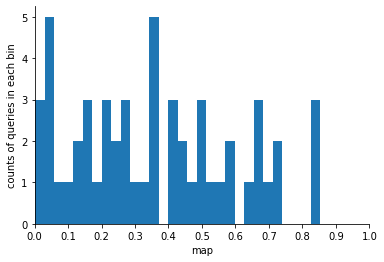

In [36]:
fig, ax = plt.subplots()
plt.hist(query_result[query_result["measure"]=="map"]["value"], bins=30)
plt.xlim([0,1])
plt.xticks(np.arange(0,1.1,0.1))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xlabel("map")
plt.ylabel("counts of queries in each bin")
plt.show()

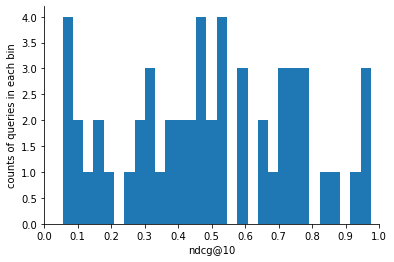

In [37]:
fig, ax = plt.subplots()
plt.hist(query_result[query_result["measure"]=="ndcg_cut_10"]["value"], bins=30)
plt.xlim([0,1])
plt.xticks(np.arange(0,1.1,0.1))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xlabel("ndcg@10")
plt.ylabel("counts of queries in each bin")
plt.show()

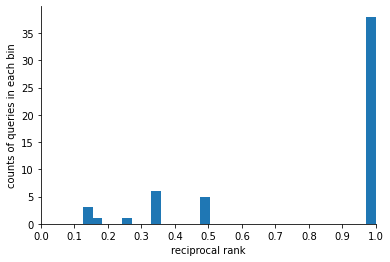

In [38]:
fig, ax = plt.subplots()
plt.hist(query_result[query_result["measure"]=="recip_rank"]["value"], bins=30)
plt.xlim([0,1])
plt.xticks(np.arange(0,1.1,0.1))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xlabel("reciprocal rank")
plt.ylabel("counts of queries in each bin")
plt.show()

In [264]:
query_result_d2q = pd.read_csv("./results/BM25_doc2query.csv", index_col=0).sort_values(by="value", ascending=False)


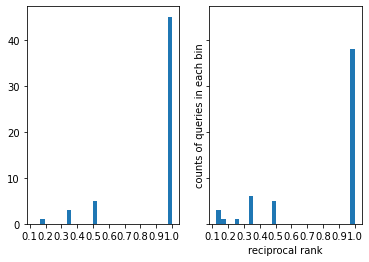

In [294]:
fig, ax = plt.subplots(1, 2, sharex='all', sharey='all')
ax[0].hist(query_result_d2q[query_result_d2q["measure"]=="recip_rank"]["value"], bins=30)
plt.xticks(np.arange(0,1.1,0.1))

ax[1].hist(query_result[query_result["measure"]=="recip_rank"]["value"], bins=30)

plt.xlabel("reciprocal rank")
plt.ylabel("counts of queries in each bin")
plt.show()

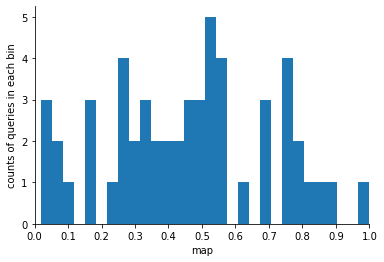

In [267]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.hist(query_result_d2q[query_result_d2q["measure"]=="map"]["value"], bins=30)
ax1.xlim([0,1])
ax1.xticks(np.arange(0,1.1,0.1))
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.xlabel("map")
ax1.ylabel("counts of queries in each bin")
ax1.show()

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
